In [35]:
import copy
from model_function import *
import scipy.stats
import csv
import seaborn as sns; sns.set()
import pickle
import matplotlib
import pandas as pd

# Plot the final Result

In [36]:
rearanged_keys = ['thompson', 'balanced', 'e-greedy0.1', 'e-greedy0.3', 
                  'e-greedy0.5', 'e-greedy0.7', 'e-greedy0.9', 'greedy', 'ucb']
plot_keys = ['thom', 'bala', 'e-0.1', 'e-0.3', 'e-0.5', 'e-0.7', 'e-0.9', 'gre','ucb']

------------------------------------------------------
weak
policies	reward_mean		reward_std		var_mean		var_std
thompson  	96.67979912226068	70.61630685991422	1.8535373484188986	1.10224499928173
balanced  	-2.168646720084887	3.176022598437088	0.8566726874588078	0.43853455371889766
e-greedy0.1	10.345580937141442	10.6533283143487	1.086403483323557	0.5504048099083331
e-greedy0.3	34.277483345807255	26.211769799417397	1.5733936755736366	0.817526524458056
e-greedy0.5	46.01332278842912	34.092338009479036	2.152895534874169	1.176582566506995
e-greedy0.7	42.94440089894026	31.83428188059062	2.86870373346374	1.6928690985172323
e-greedy0.9	20.167486886651822	17.621761713896404	3.650234575627721	1.9030422524883688
greedy    	2.679205763618092	6.803744908183227	3.4456931314051724	2.131928159327278
ucb       	49.89673501848844	37.118689257719666	2.1551843789576752	1.8766985141394619
------------------------------------------------------
medium
policies	reward_mean		reward_std		var_mean		var_std
thomps

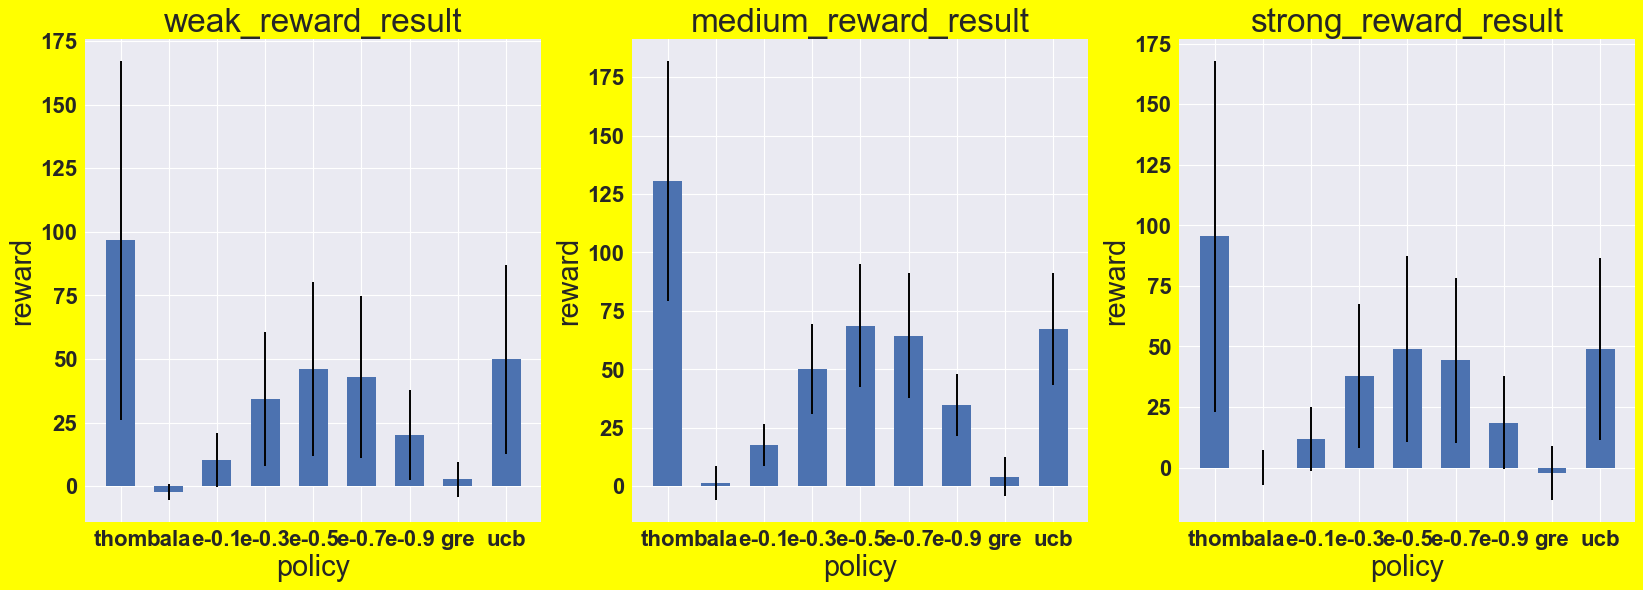

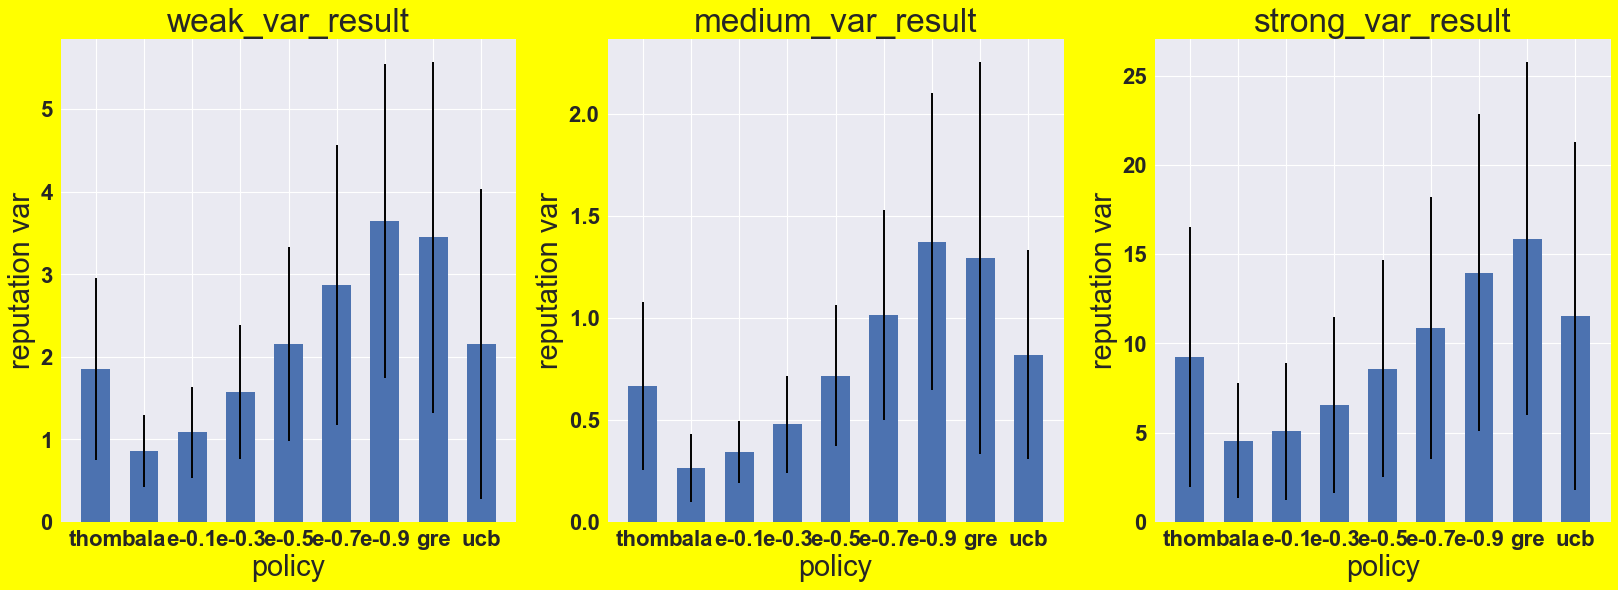

In [37]:
plt.figure(num=1, figsize=(25, 8), dpi=80, facecolor='yellow', edgecolor='k')
plt.figure(num=2, figsize=(25, 8), dpi=80, facecolor='yellow', edgecolor='k')
# home_degrees = ['weak','medium','strong']
home_degrees = ['weak','medium','strong']
plt_count = 0
test_count = 50
is_rescale = False
for home_deg in home_degrees:
    print('------------------------------------------------------')
    print(home_deg)
    new_reward = {}
    new_performance = {}
    with open('new_res_data/'+str(home_deg)+ '_adopt_output.csv', 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        new_reward = dict(csv_reader)
#         print(new_reward)
#         print(len(new_reward))
        for key,value in new_reward.items():
            new_reward[key] = [float(i) for i in value[1:-1].split(',')]
        if is_rescale:
            for count in range(test_count):
                temp_max = np.max([new_reward[policy][count] for policy in new_reward.keys()])
                temp_min = np.min([new_reward[policy][count] for policy in new_reward.keys()])
                for policy in new_reward.keys():
                    new_reward[policy][count] = (temp_max-new_reward[policy][count])/(temp_max-temp_min)
            
        for policy in rearanged_keys:
            if policy not in new_performance:
                new_performance[policy] = {}
            new_performance[policy]['reward_mean'] = np.mean(new_reward[policy])
            new_performance[policy]['reward_std'] = np.std(new_reward[policy])
        means = [new_performance[policy]['reward_mean'] for policy in rearanged_keys]
#         median = [new_performance[policy]['adopt_medium']  for policy in new_performance.keys()]
        std = [new_performance[policy]['reward_std'] for policy in rearanged_keys]
        ind = np.arange(len(new_performance.keys()))
        width = 0.6
        plt.figure(1)
        plt.subplot(1,3,1+plt_count)
        plt.xlabel('policy', fontsize = 26)
        plt.ylabel('reward',fontsize = 26)
        plt.title(home_deg+'_reward_result',fontsize = 30)
        plt.tick_params(axis='both', which='major', labelsize=20)
#         plt.tick_params(axis='both', which='minor', labelsize=10)
        p1 = plt.bar(ind, means, width, yerr=std)
        plt.xticks(ind, plot_keys)
        
    fair_value = dict()
    with open('result_data/'+str(home_deg)+ '_var_output.csv', 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        fair_value = dict(csv_reader)
#         print(new_reward)
        for key,value in fair_value.items():
            fair_value[key] = [float(i) for i in value[1:-1].split(',')]
        if is_rescale:
            for count in range(test_count):
                temp_max = np.max([fair_value[policy][count] for policy in fair_value.keys()])
                temp_min = np.min([fair_value[policy][count] for policy in fair_value.keys()])
                for policy in fair_value.keys():
                    fair_value[policy][count] = (fair_value[policy][count]-temp_min)/(temp_max-temp_min)
        for policy in rearanged_keys:
            new_performance[policy]['var_mean'] = np.mean(fair_value[policy])
            new_performance[policy]['var_std'] = np.std(fair_value[policy])
        means = [new_performance[policy]['var_mean'] for policy in rearanged_keys]
#         median = [new_performance[policy]['adopt_medium']  for policy in new_performance.keys()]
        std = [new_performance[policy]['var_std'] for policy in rearanged_keys]
        ind = np.arange(len(new_performance.keys()))
        width = 0.6
        plt.figure(2)
        plt.subplot(1,3,1+plt_count)
        plt.xlabel('policy',fontsize = 26)
        plt.ylabel('reputation var',fontsize = 26)
        plt.title(home_deg+'_var_result',fontsize = 30)
        plt.tick_params(axis='both', which='major', labelsize=20)
        p1 = plt.bar(ind, means, width, yerr=std)
        plt.xticks(ind, plot_keys)
        print('policies\treward_mean\t\treward_std\t\tvar_mean\t\tvar_std')
        for name, values in new_performance.items():
            print('{:10}\t{}\t{}\t{}\t{}'.format(name, values['reward_mean'],values['reward_std'], 
                                                     values['var_mean'], values['var_std']))
    plt_count += 1  
plt.figure(1)
plt.savefig('res_figure/Final_reward_result.jpeg')
plt.figure(2)
plt.savefig('res_figure/Final_var_result.jpeg')
plt.show()

# Search the appropriate times

Total time is:  100
Home_degree is:  weak
policies		adopt_mean	adopt_std
thompson		8.976617091192407	7.657513558328905
greedy		28.679007403955353	14.241096612784023
e-greedy0.1		29.588576204193014	14.902294016586845
e-greedy0.3		29.159287297139798	15.245411597859706
e-greedy0.5		23.984652665487715	13.385744966386705
e-greedy0.7		15.96820926118764	9.471595568897646
e-greedy0.9		5.805103734446917	8.09472159978987
balanced		2.2920383351967333	7.449212096052437
ucb		17.64501706558811	10.246818834531473
Home_degree is:  medium
policies		adopt_mean	adopt_std
thompson		15.265195851064748	8.649945660254685
greedy		36.73910456037438	17.08991313713808
e-greedy0.1		37.70774023328042	16.9099573639032
e-greedy0.3		35.659005112343856	16.30544572782353
e-greedy0.5		29.312592581707463	14.05866478745275
e-greedy0.7		21.84591983598109	11.478641289704564
e-greedy0.9		13.020415866946923	8.273385990415443
balanced		9.046175849422772	6.771884031897616
ucb		26.82192266601904	12.890382289591646
Home_degree is

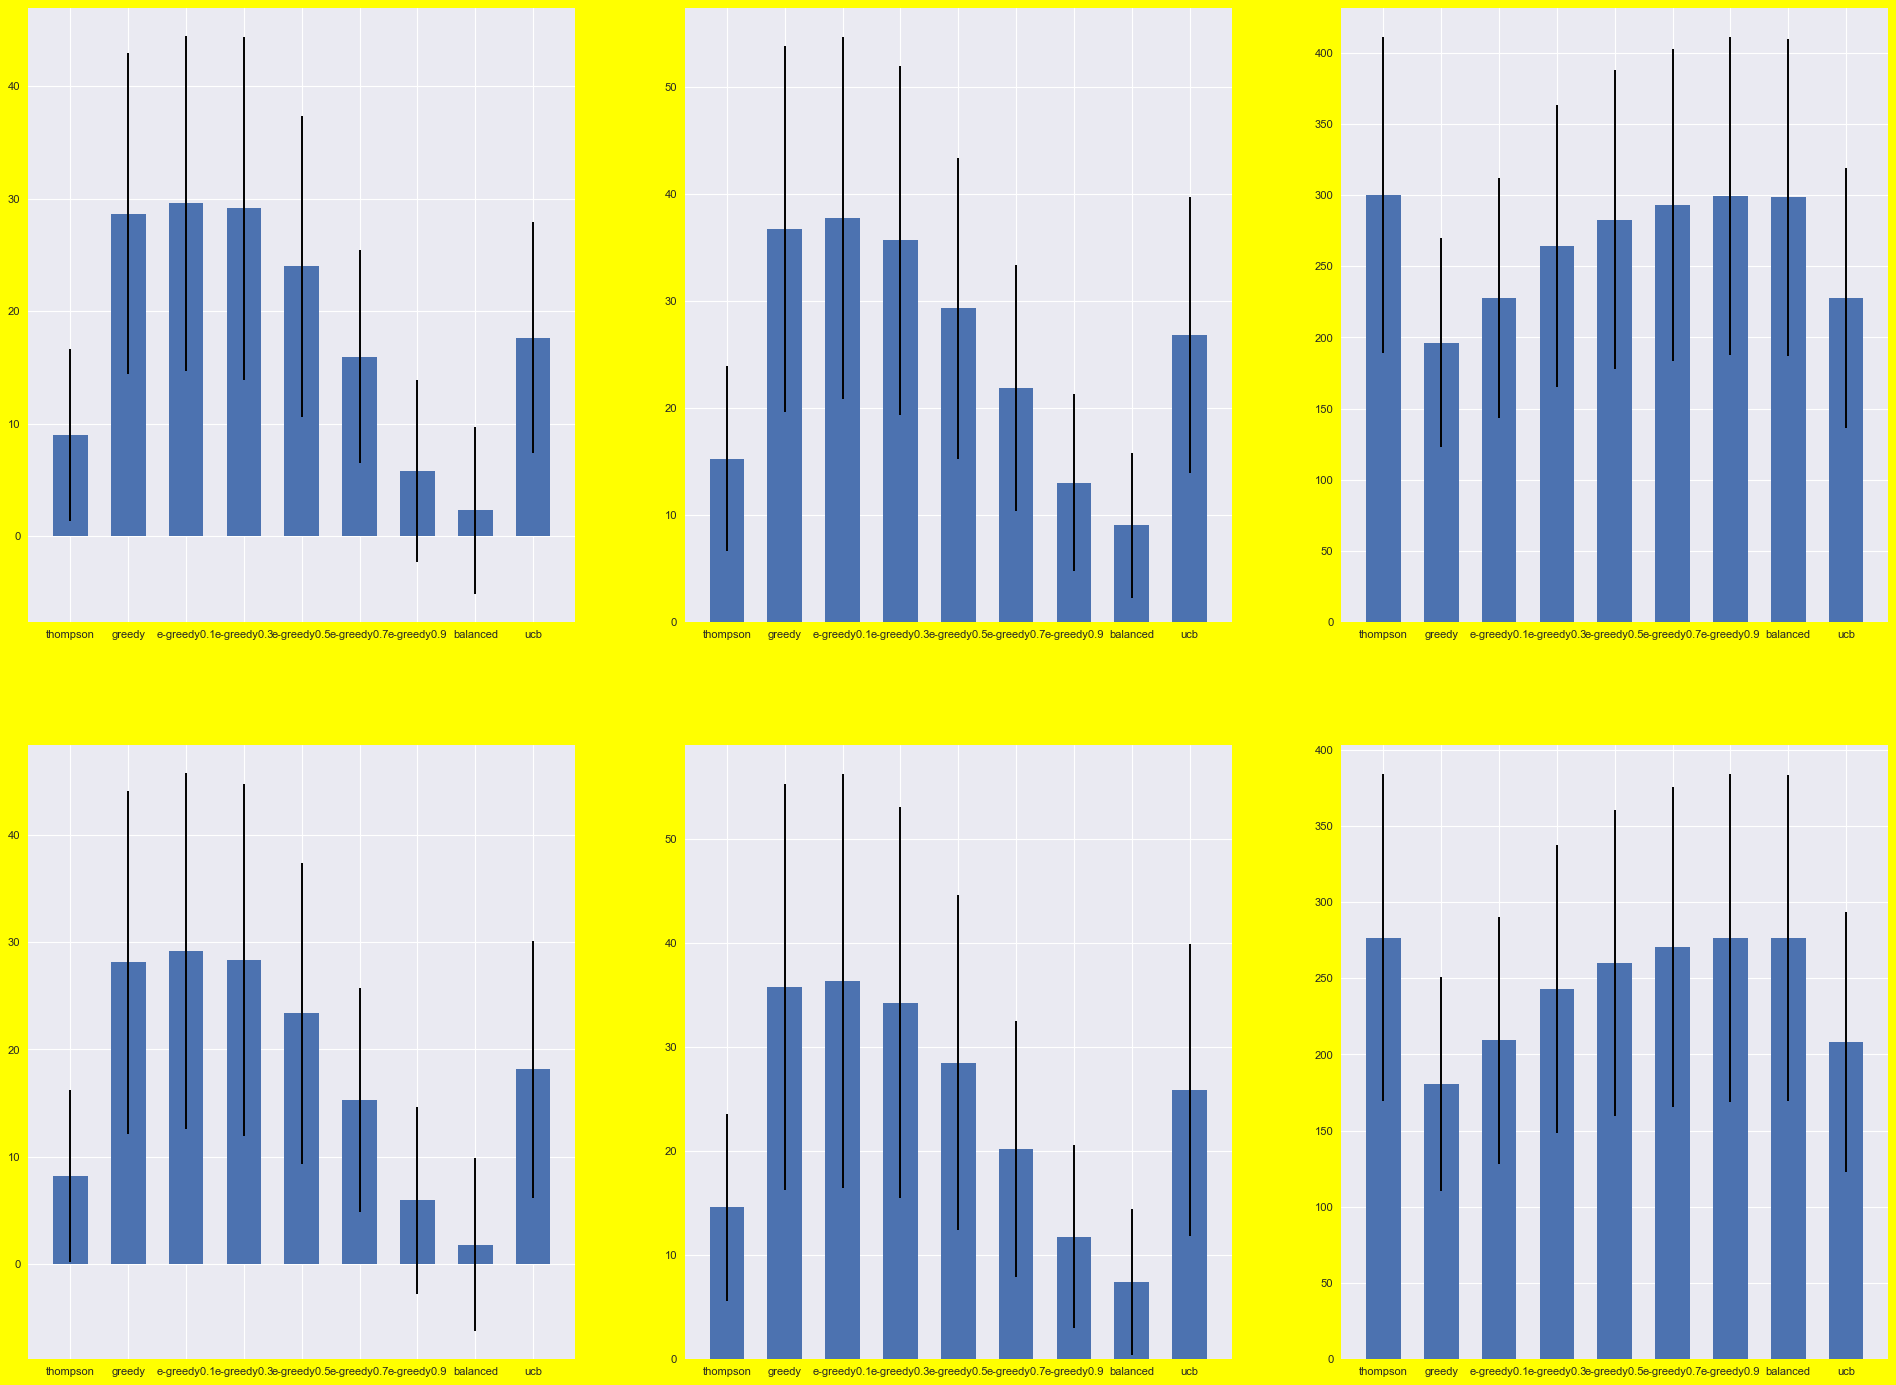

In [40]:
plt.figure(num=1, figsize=(30, 120), dpi=80, facecolor='yellow', edgecolor='k')
plt.figure(num=2, figsize=(30, 120), dpi=80, facecolor='yellow', edgecolor='k')
home_degrees = ['weak','medium','strong']
Test_times = [100, 1000]
plt_count = 0
for time in Test_times:
    print("Total time is: ", time)
    for home_deg in home_degrees:
        print("Home_degree is: ", home_deg)
        new_reward = {}
        new_performance = {}
        with open('../previous result/'+str(home_deg)+ '_adopt_output.csv', 'r') as csv_file:
            csv_reader = csv.reader(csv_file)
            new_reward = dict(csv_reader)

            for key,value in new_reward.items():
                new_reward[key] = [float(i) for i in value[1:-1].split(',')]
            for policy in new_reward.keys():
                new_performance[policy] = {'mean': np.mean(new_reward[policy][:time]), 
                                           'std': np.std(new_reward[policy][:time])}
            print('policies\t\tadopt_mean\tadopt_std')
            for name, values in new_performance.items():
                print('{}\t\t{}\t{}'.format(name, values['mean'],values['std']))
            means = [new_performance[policy]['mean'] for policy in new_performance.keys()]
            std = [new_performance[policy]['std'] for policy in new_performance.keys()]
            ind = np.arange(len(new_performance.keys()))
            width = 0.6
            plt.figure(1)
            plt.subplot(10,3,1+plt_count)
            p1 = plt.bar(ind, means, width, yerr=std)
            plt.xticks(ind, new_performance.keys())
#     new_performance = {}
#     fair_value = dict()
#     with open(str(home_deg)+ '_var_output.csv', 'r') as csv_file:
#         csv_reader = csv.reader(csv_file)
#         fair_value = dict(csv_reader)
# #         print(new_reward)
#         for key,value in fair_value.items():
#             fair_value[key] = [float(i) for i in value[1:-1].split(',')]
#         for count in range(1000):
#             temp_max = np.max([fair_value[policy][count] for policy in fair_value.keys()])
#             temp_min = np.min([fair_value[policy][count] for policy in fair_value.keys()])
#             for policy in fair_value.keys():
#                 fair_value[policy][count] = (fair_value[policy][count]-temp_min)/(temp_max-temp_min)
#         for policy in fair_value.keys():
#             new_performance[policy] = {'mean': np.mean(fair_value[policy]), 'std': np.std(fair_value[policy])}
#         means = [new_performance[policy]['mean'] for policy in new_performance.keys()]
# #         median = [new_performance[policy]['adopt_medium']  for policy in new_performance.keys()]
#         std = [new_performance[policy]['std'] for policy in new_performance.keys()]
#         ind = np.arange(len(new_performance.keys()))
#         width = 0.6
#         plt.figure(2)
#         plt.subplot(1,3,1+plt_count)
#         p1 = plt.bar(ind, means, width, yerr=std)
#         plt.xticks(ind, new_performance.keys())
        plt_count += 1
plt.show()

# Visualize the processed result

In [120]:
import pickle

In [387]:
def obtain_accumulate(data_np):
    rows,cols = data_np.shape
    res_data = np.zeros((rows, cols))
    for i in range(rows):
        temp_sum = 0
        for j in range(cols):
            temp_sum += data_np[i,j]
            res_data[i, j] = temp_sum
    
    return res_data

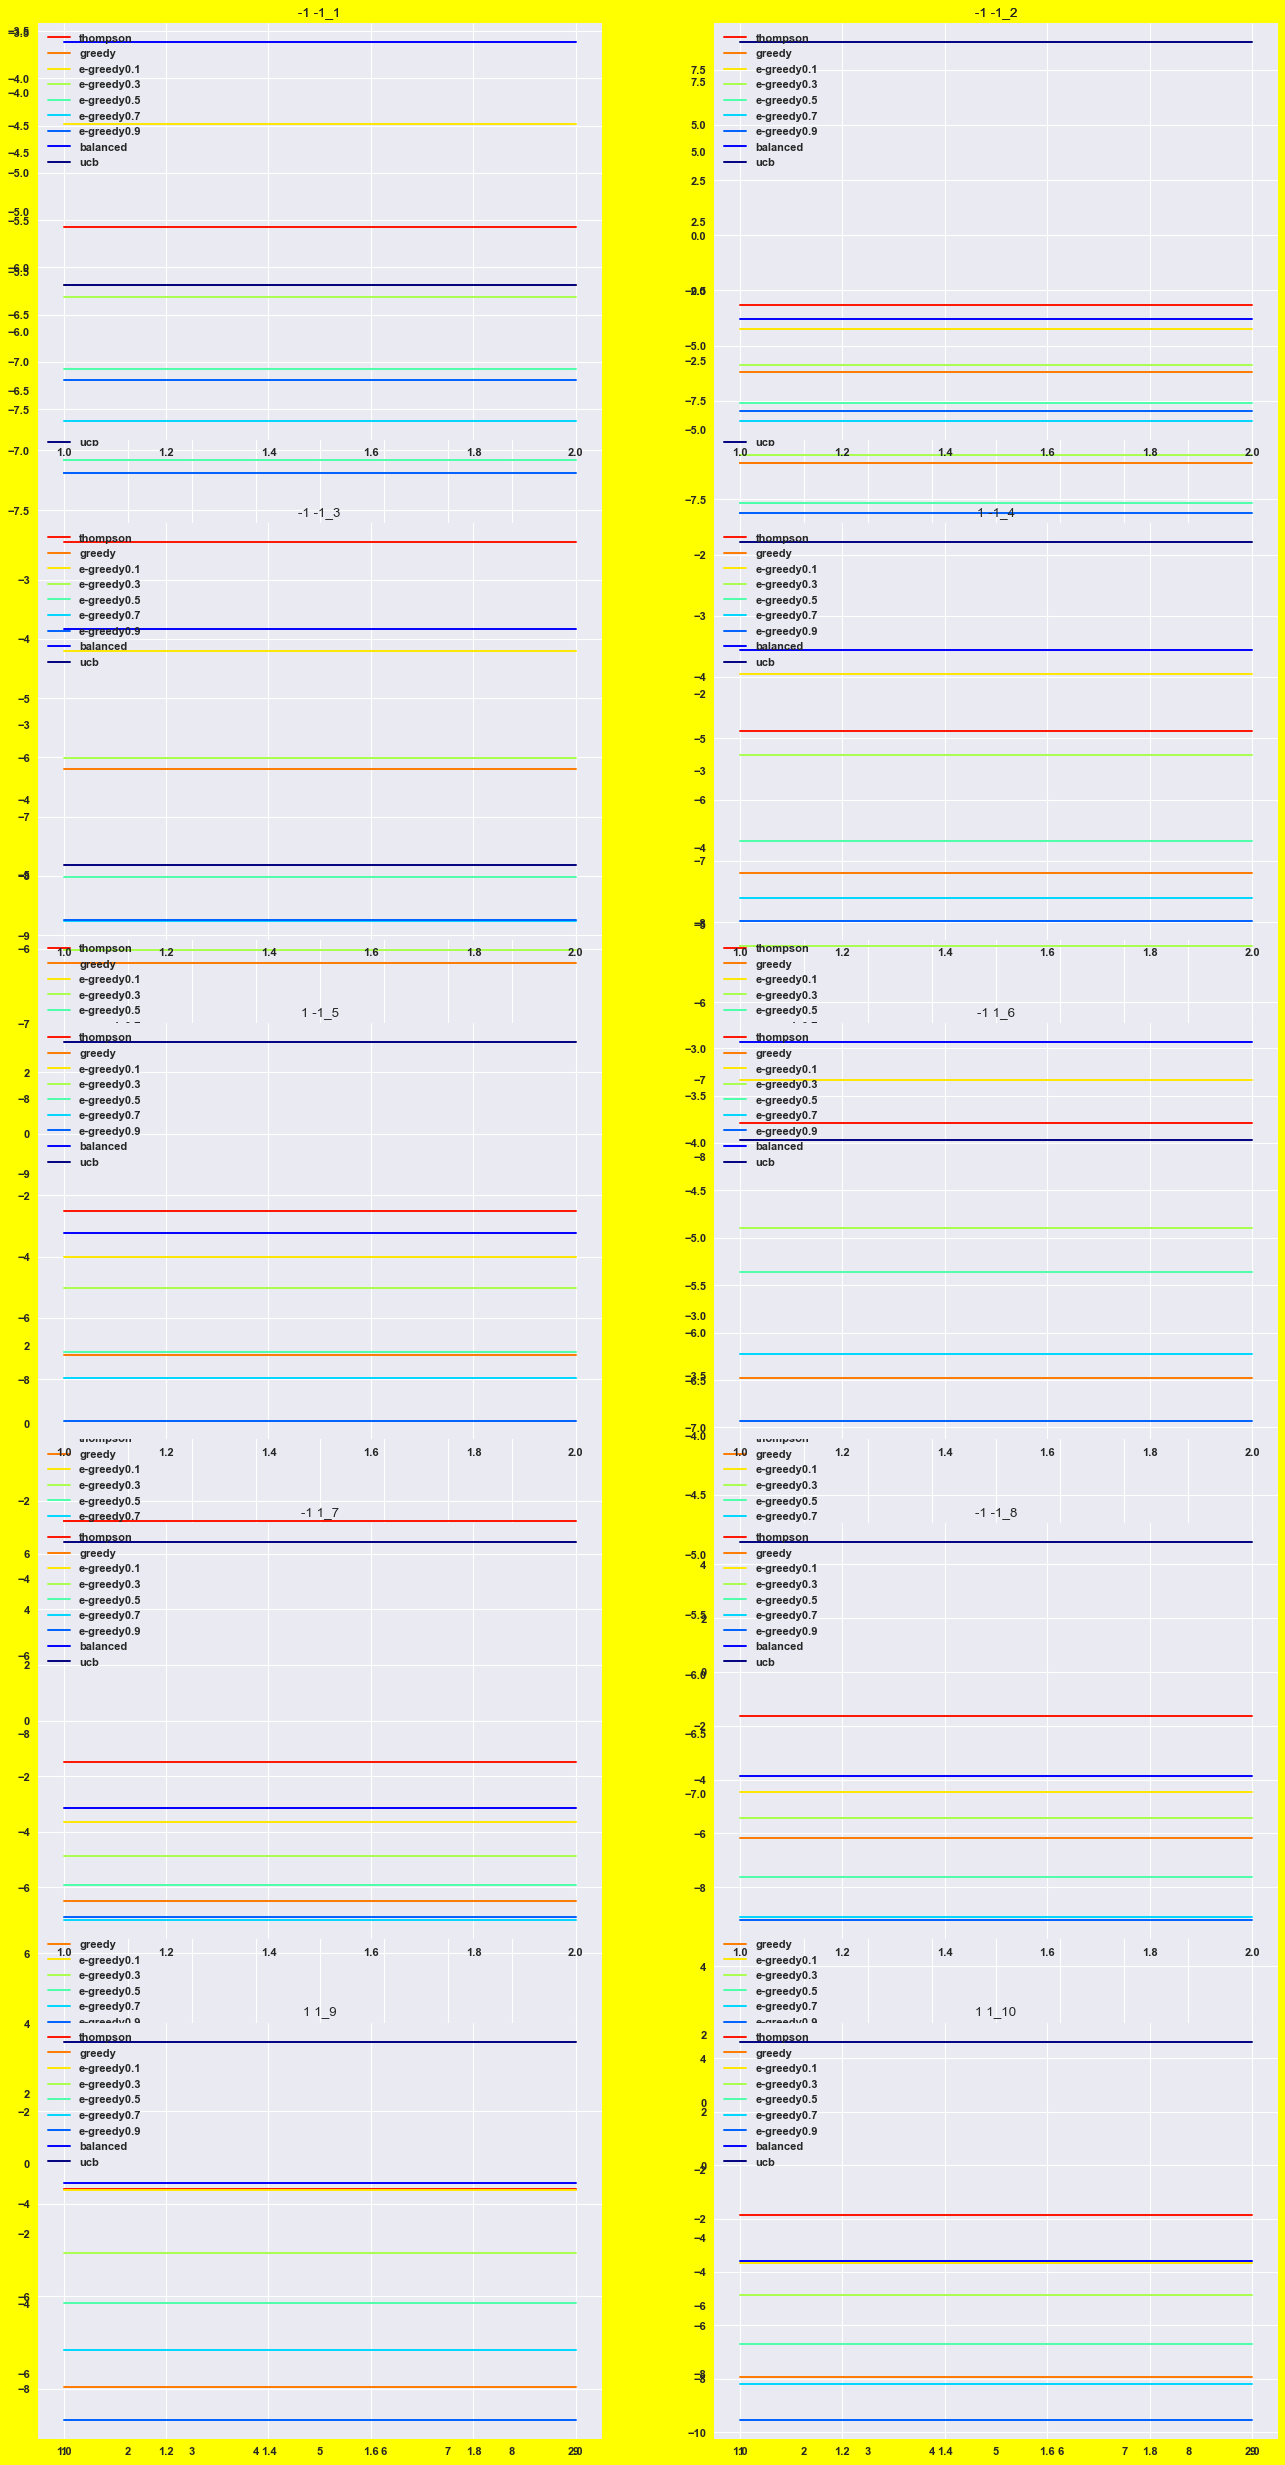

In [399]:
weak_overall_processed_res = pickle.load(open('result_data/weak_process_res.pkl', 'rb'))
policies = list(weak_overall_processed_res[0].keys())
# policies.remove('ucb')
# policies.remove('thompson')
overall_perform = {}
X_name_list = list(weak_overall_processed_res[0]['balanced'].keys())
time_step = 2
for policy in policies:
    overall_perform[policy] = {}
    for weak_res in weak_overall_processed_res:
        for X_name in weak_res[policy].keys():
                if X_name not in overall_perform[policy]:
                    overall_perform[policy][X_name] = {}
                    
                    for time in range(1,time_step):
                        overall_perform[policy][X_name][time] = [weak_res[policy][X_name][time]]
                else: 
                    for time in range(1,time_step):
                        overall_perform[policy][X_name][time].append(weak_res[policy][X_name][time])
        
fig = plt.figure(num=1, figsize=(20, 40), dpi=80, facecolor='yellow', edgecolor='k')
plt_count = 1
new_performance = {}

cmap = plt.get_cmap('jet_r')
for X_name in X_name_list:
    new_performance[X_name] = {}
    y = np.zeros((len(policies), 2))
    x_count = 0
    for policy in policies:
        new_performance[X_name][policy] = {}
        y_count = 0
        for time in range(1,time_step):
            new_performance[X_name][policy][time] = [np.mean(overall_perform[policy][X_name][time]),
                                                     np.std(overall_perform[policy][X_name][time])]
            y[x_count][y_count] = new_performance[X_name][policy][time][0]
            y_count += 1
        x_count += 1
    y = obtain_accumulate(y)
    labels = policies
#     plt.figure(1)
    ax = fig.add_subplot(5, 2, plt_count)
    ax.set_title(X_name)
    color_count = 1
    N = 9
    for y_arr, label in zip(y, labels):
        color = cmap(float(color_count)/N)
        plt.plot(range(1,time_step+1), y_arr, label=label, c = color)
        color_count += 1
#     ax.stackplot(range(1,10),y, labels=labels)
    ax.legend(loc='upper left')
    plt_count += 1
plt.savefig('weak_process.jpg')
plt.show()


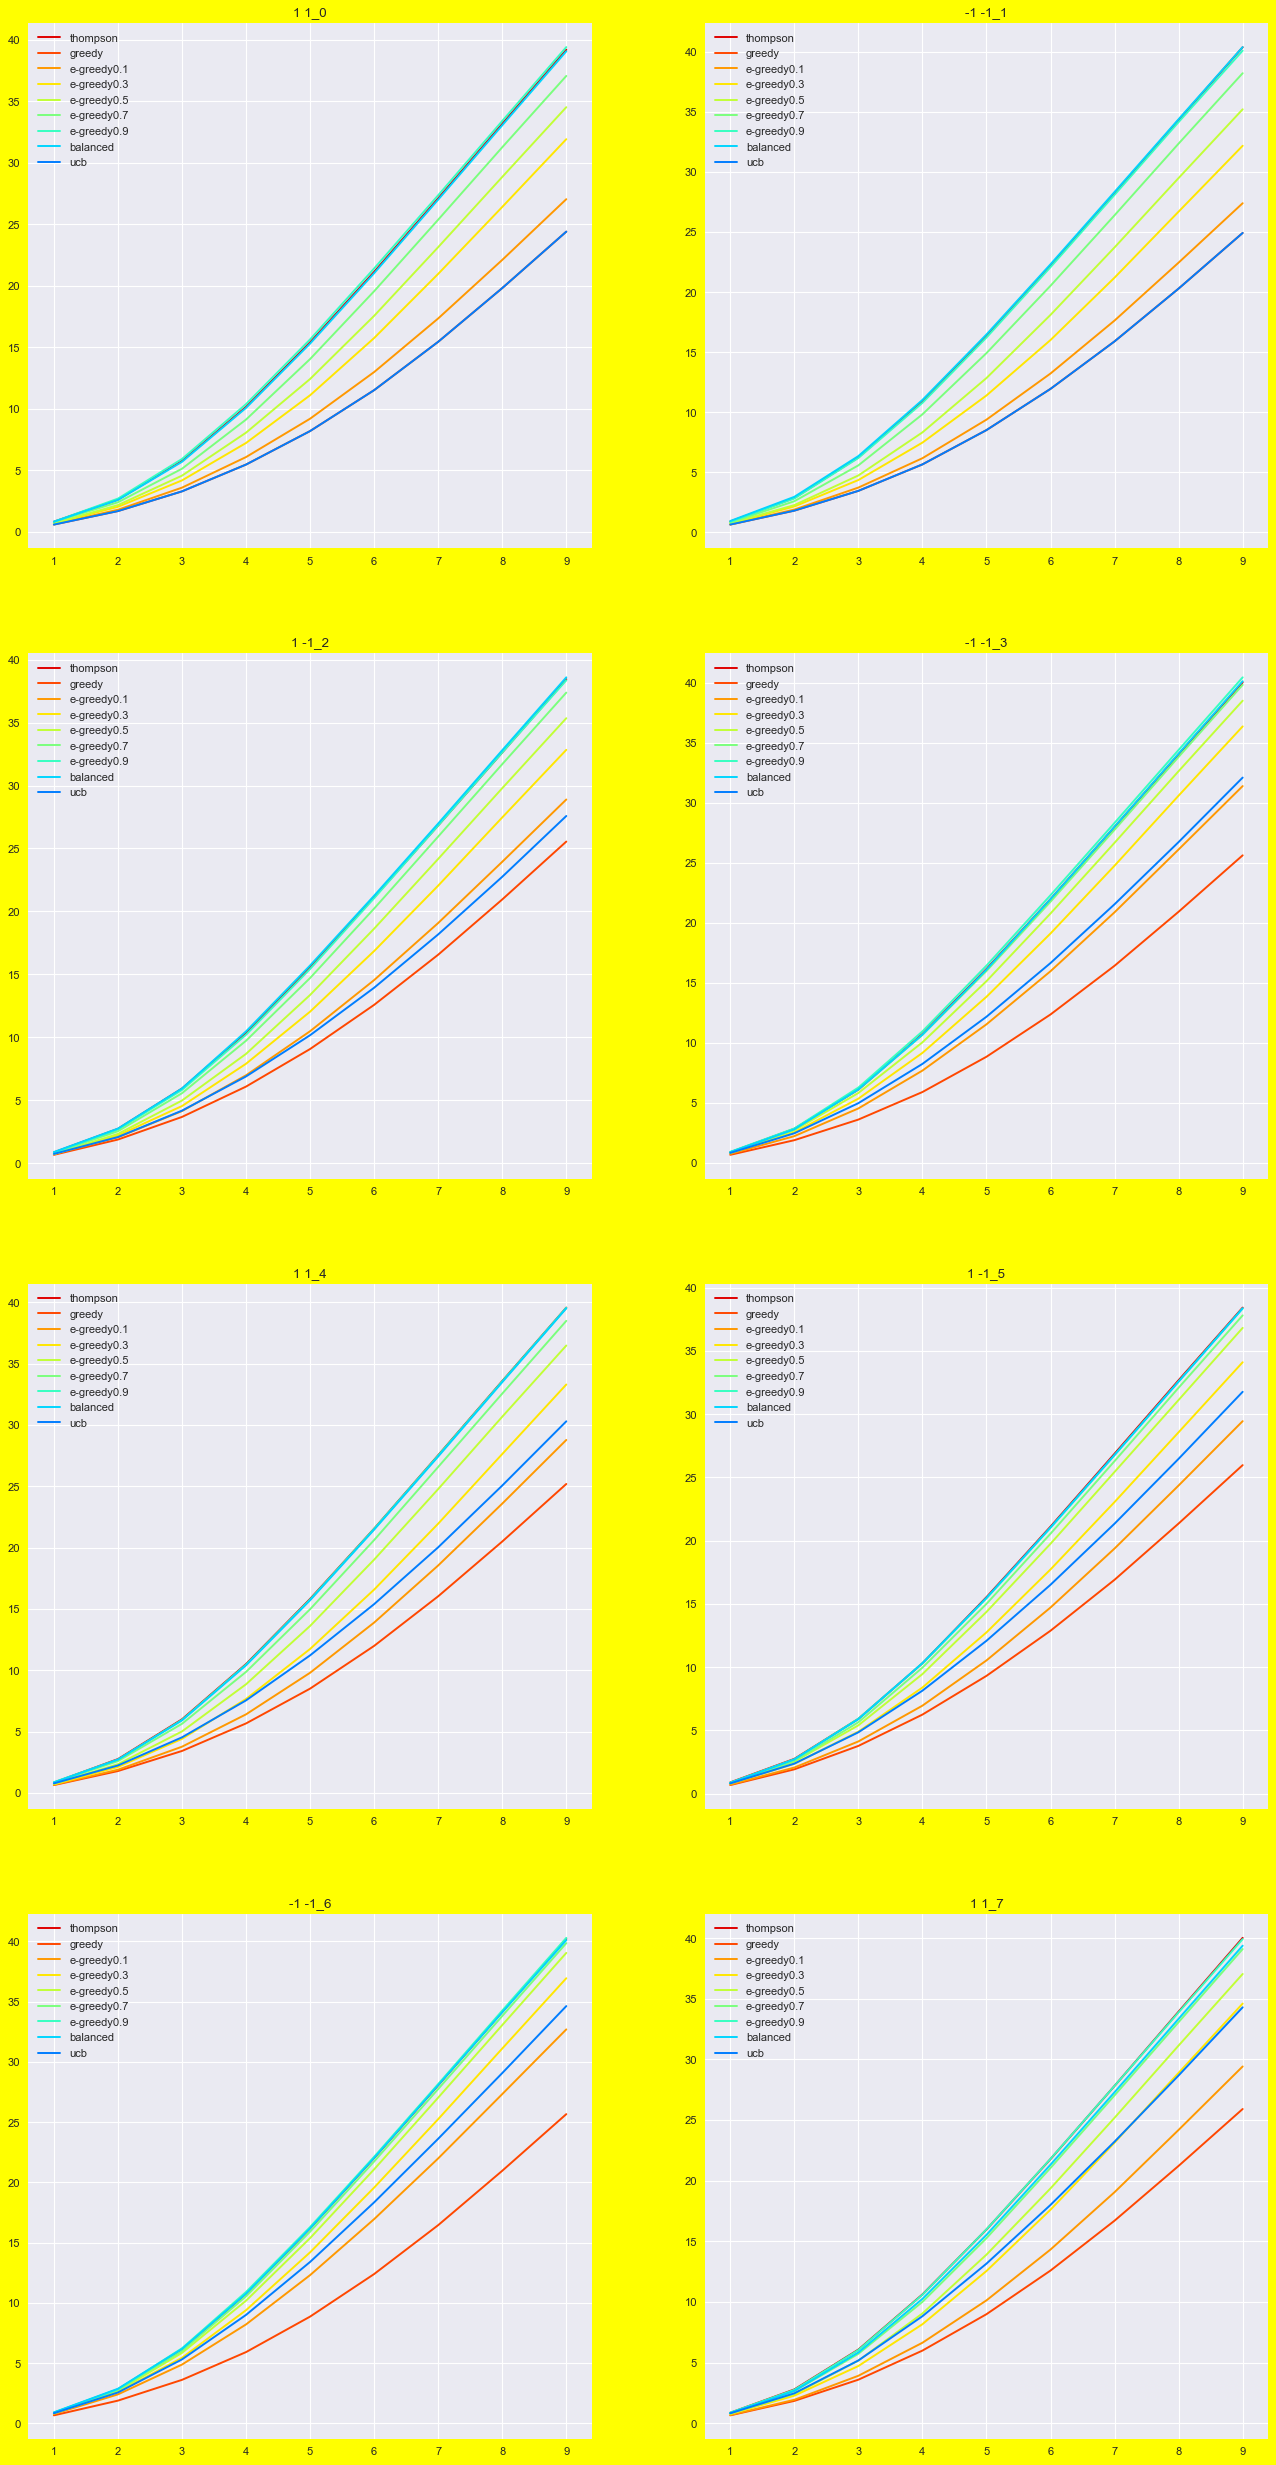

In [153]:
strong_overall_processed_res = pickle.load(open('strong_process_res.pkl', 'rb'))
policies = list(strong_overall_processed_res[0].keys())
# policies.remove('ucb')
# policies.remove('thompson')
overall_perform = {}
X_name_list = list(strong_overall_processed_res[0]['balanced'].keys())

for policy in policies:
    overall_perform[policy] = {}
    for strong_res in strong_overall_processed_res:
        for X_name in strong_res[policy].keys():
                if X_name not in overall_perform[policy]:
                    overall_perform[policy][X_name] = {}
                    
                    for time in range(1,10):
                        overall_perform[policy][X_name][time] = [strong_res[policy][X_name][time]]
                else: 
                    for time in range(1,10):
                        overall_perform[policy][X_name][time].append(strong_res[policy][X_name][time])
        
fig = plt.figure(num=1, figsize=(20, 40), dpi=80, facecolor='yellow', edgecolor='k')
plt_count = 1
new_performance = {}
cmap = plt.get_cmap('jet_r')
for X_name in X_name_list:
    new_performance[X_name] = {}
    y = np.zeros((len(policies), 9))
    x_count = 0
    for policy in policies:
        new_performance[X_name][policy] = {}
        y_count = 0
        for time in range(1,10):
            new_performance[X_name][policy][time] = [np.mean(overall_perform[policy][X_name][time]),
                                                     np.std(overall_perform[policy][X_name][time])]
            y[x_count][y_count] = new_performance[X_name][policy][time][0]
            y_count += 1
        x_count += 1
    y = obtain_accumulate(y)
    labels = policies
#     plt.figure(1)
    ax = fig.add_subplot(4, 2, plt_count)
    ax.set_title(X_name)
    color_count = 1
    N = 12
    for y_arr, label in zip(y, labels):
        color = cmap(float(color_count)/N)
        plt.plot(range(1,10), y_arr, label=label, c = color)
        color_count += 1
    ax.legend(loc='upper left')
    plt_count += 1
plt.savefig('strong_process.jpg')
plt.show()

# Pearson Analysis/ Spearman Analysis

### ------ Consider the network structure and the utilities' result

In [38]:
from scipy.stats import *

In [39]:
pref_dict = {}
for Homo_deg in Homo_degs:
    file = 'new_res_data/'+Homo_deg+'_network_pref.pkl'
    network_prefs = pickle.load(open(file, 'rb'))
    pref_dict[Homo_deg] = []
    for pref in network_prefs:
        if pref['pos'] > pref['neg']:
            pref_dict[Homo_deg].append(1)
        else:
            pref_dict[Homo_deg].append(0)

/Users/sun/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


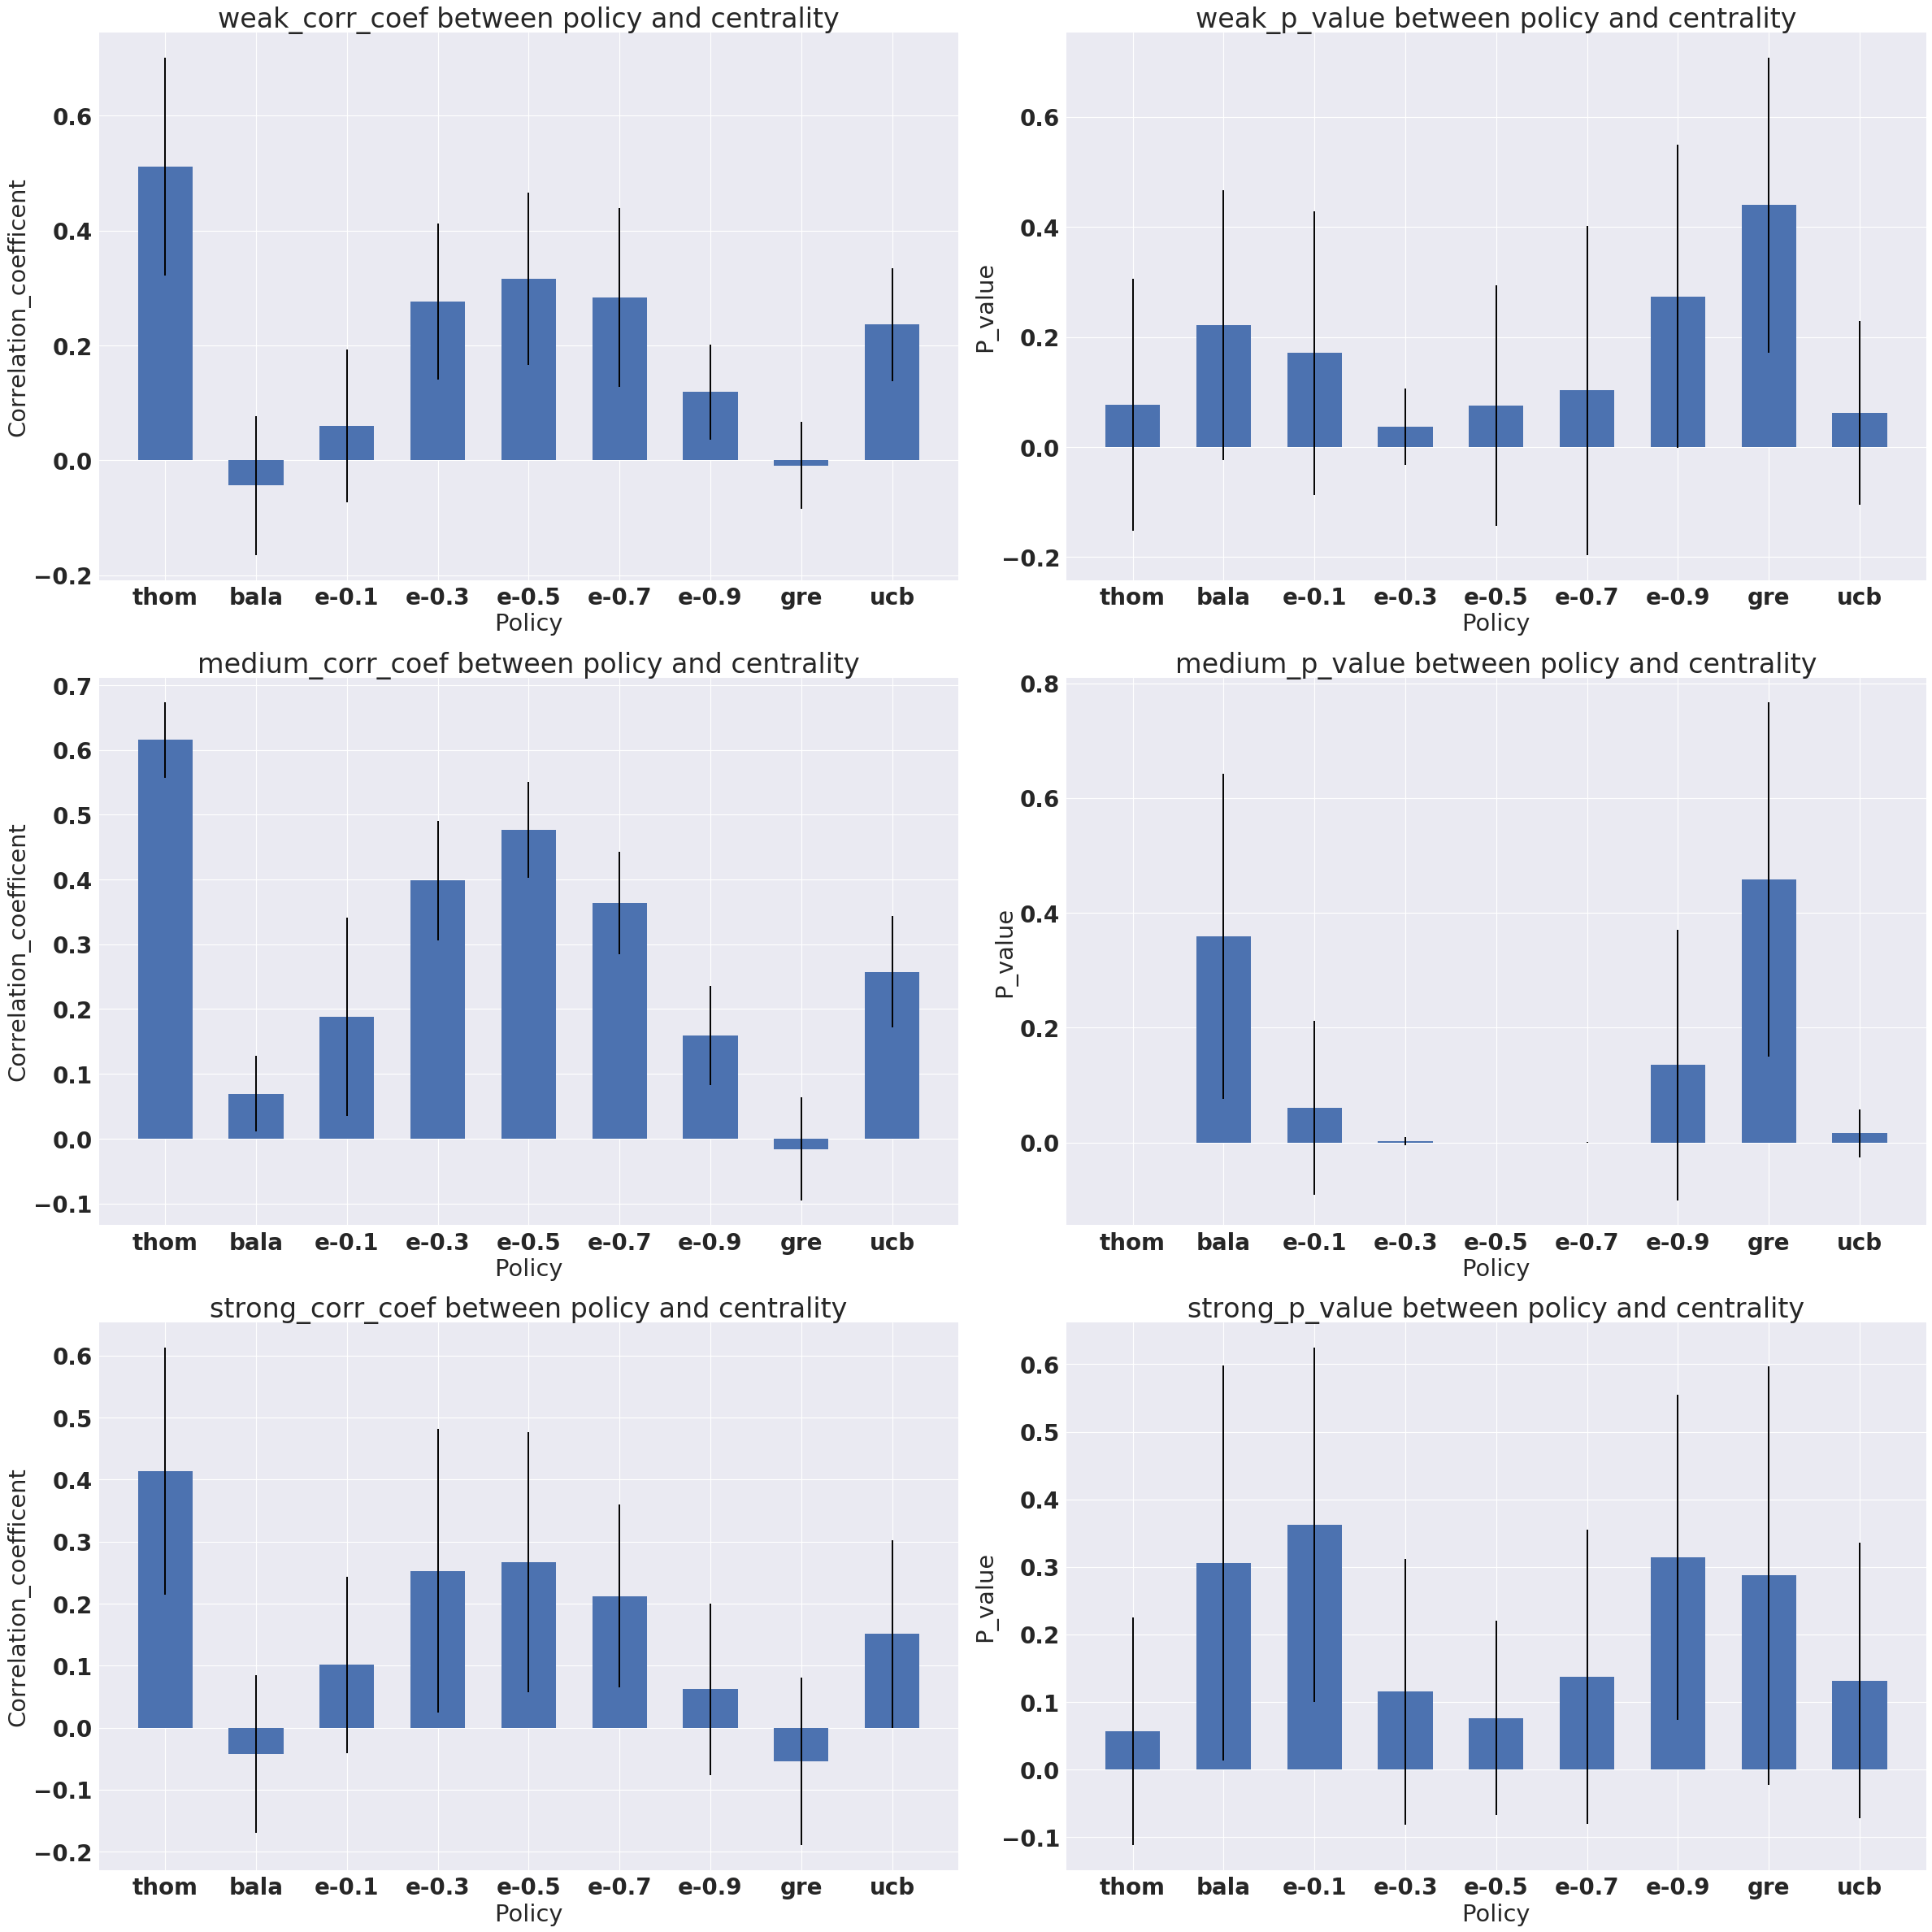

In [45]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=22) 
matplotlib.rc('ytick', labelsize=22) 
Homo_degs = ['weak', 'medium', 'strong']
plt_count = 0
plt.figure(num=5, figsize=(30, 30), dpi=80, edgecolor='k')
for Homo_deg in Homo_degs:
    Pair_file = 'new_res_data/'+Homo_deg+'_pair_vectors.pkl'
    pair_vects = pickle.load(open(Pair_file, 'rb'))
    Pearson_analysis = {}
    network_name = 'network'
    for policy, vectors in pair_vects[0].items():
        if policy != network_name:
            Pearson_analysis[policy] = {}
            Pearson_analysis[policy]['Pearson_cor'] = []
            Pearson_analysis[policy]['P_value_2'] = []
    policies = list(Pearson_analysis.keys())
    count = 0
    for pair_vec in pair_vects:
#         if pref_dict[Homo_deg][count] == 0:
#             count += 1
#             continue
#         count += 1
        network_vector = np.squeeze(np.asarray(pair_vec[network_name]))
    #     print(network_vector)
        for policy in policies:
            pear_cor, p_val = pearsonr(network_vector, pair_vec[policy])
            Pearson_analysis[policy]['Pearson_cor'].append(pear_cor)
            Pearson_analysis[policy]['P_value_2'].append(p_val)
    new_performance = {}
    for policy in policies:
        new_performance[policy] = {}
        new_performance[policy]['cor_mean'] = np.mean(Pearson_analysis[policy]['Pearson_cor'])
        new_performance[policy]['cor_std'] = np.std(Pearson_analysis[policy]['Pearson_cor'])
        new_performance[policy]['p_mean'] = np.mean(Pearson_analysis[policy]['P_value_2'])
        new_performance[policy]['p_std'] = np.std(Pearson_analysis[policy]['P_value_2'])



    means = [new_performance[policy]['cor_mean'] for policy in rearanged_keys]
    std = [new_performance[policy]['cor_std'] for policy in rearanged_keys]
    ind = np.arange(len(new_performance.keys()))
    width = 0.6
    plt.figure(5)
    plt.subplot(3,2,1+plt_count)
    p1 = plt.bar(ind, means, width, yerr=std)
    plt.xticks(ind, plot_keys)
    plt.xlabel('Policy', fontsize = 26)
    plt.ylabel('Correlation_coefficent', fontsize = 26)
    plt.title(Homo_deg + "_corr_coef between policy and centrality", fontsize = 30)
    plt.tick_params(axis='both', which='major', labelsize=25)

    means = [new_performance[policy]['p_mean'] for policy in rearanged_keys]
    std = [new_performance[policy]['p_std'] for policy in rearanged_keys]
    ind = np.arange(len(new_performance.keys()))
    plt.subplot(3,2,2+plt_count)
    p1 = plt.bar(ind, means, width, yerr=std)
    plt.xticks(ind, plot_keys)
    plt.title(Homo_deg + "_p_value between policy and centrality",fontsize = 30)
    plt.tick_params(axis='both', which='major', labelsize=25)
    plt.xlabel('Policy', fontsize = 26)
    plt.ylabel('P_value', fontsize = 26)
    plt_count += 2
plt.tight_layout()
plt.savefig('Pearson_analysis.jpeg')
plt.show()


In [41]:
for policy in policies:
        new_performance[policy]['cor_max'] = np.mean(Pearson_analysis[policy]['Pearson_cor'])
        new_performance[policy]['cor_min'] = np.std(Pearson_analysis[policy]['Pearson_cor'])
        new_performance[policy]['p_mean'] = np.mean(Pearson_analysis[policy]['P_value_2'])
        new_performance[policy]['p_std'] = np.std(Pearson_analysis[policy]['P_value_2'])

/Users/sun/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


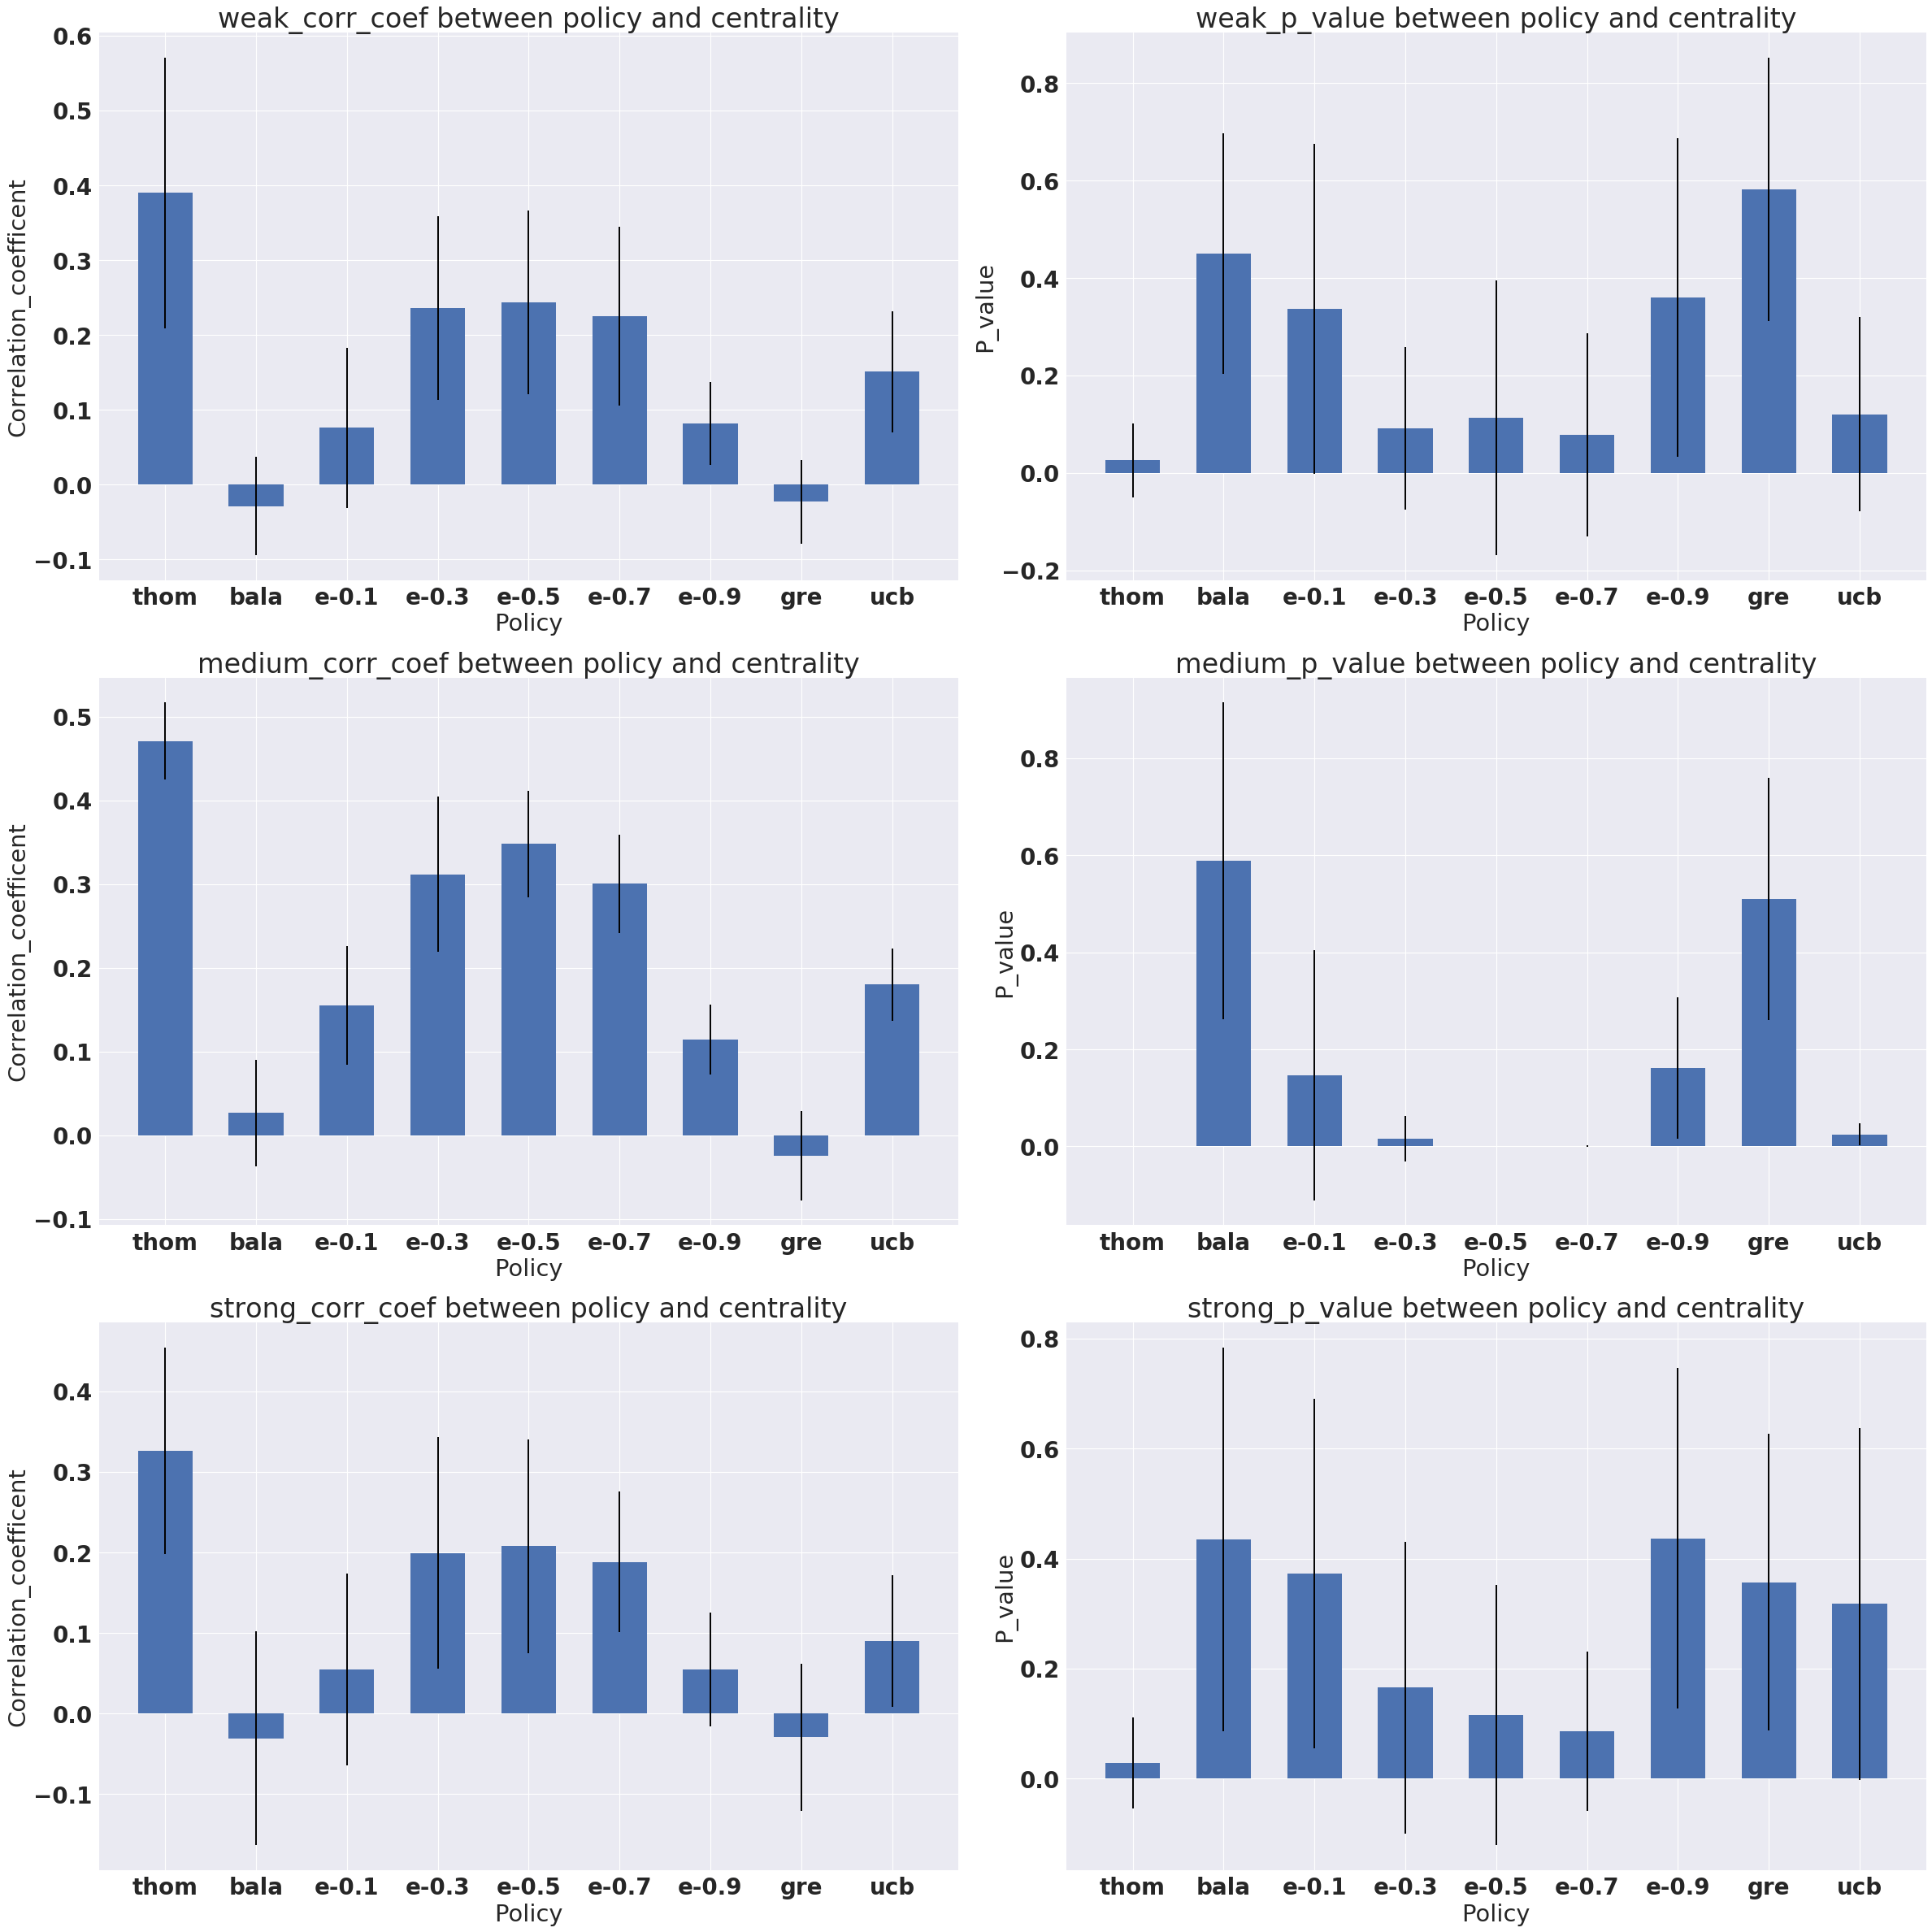

In [42]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=22) 
matplotlib.rc('ytick', labelsize=22) 
Homo_degs = ['weak', 'medium', 'strong']
plt_count = 0
plt.figure(num=5, figsize=(30, 30), dpi=80, edgecolor='k')
for Homo_deg in Homo_degs:
    Pair_file = 'new_res_data/'+Homo_deg+'_pair_vectors.pkl'
    pair_vects = pickle.load(open(Pair_file, 'rb'))
    Spearmanr_analysis = {}
    network_name = 'network'
    for policy, vectors in pair_vects[0].items():
        if policy != network_name:
            Spearmanr_analysis[policy] = {}
            Spearmanr_analysis[policy]['Spearmanr_cor'] = []
            Spearmanr_analysis[policy]['P_value_2'] = []
    policies = list(Spearmanr_analysis.keys())
    for pair_vec in pair_vects:
        network_vector = np.squeeze(np.asarray(pair_vec[network_name]))
    #     print(network_vector)
        for policy in policies:
            pear_cor, p_val = spearmanr(network_vector, pair_vec[policy])
            Spearmanr_analysis[policy]['Spearmanr_cor'].append(pear_cor)
            Spearmanr_analysis[policy]['P_value_2'].append(p_val)
    new_performance = {}
    for policy in policies:
        new_performance[policy] = {}
        new_performance[policy]['cor_mean'] = np.mean(Spearmanr_analysis[policy]['Spearmanr_cor'])
        new_performance[policy]['cor_std'] = np.std(Spearmanr_analysis[policy]['Spearmanr_cor'])
        new_performance[policy]['p_mean'] = np.mean(Spearmanr_analysis[policy]['P_value_2'])
        new_performance[policy]['p_std'] = np.std(Spearmanr_analysis[policy]['P_value_2'])



    means = [new_performance[policy]['cor_mean'] for policy in rearanged_keys]
    std = [new_performance[policy]['cor_std'] for policy in rearanged_keys]
    ind = np.arange(len(new_performance.keys()))
    width = 0.6
    plt.figure(5)
    plt.subplot(3,2,1+plt_count)
    p1 = plt.bar(ind, means, width, yerr=std)
    plt.xticks(ind, plot_keys)
    plt.xlabel('Policy', fontsize = 26)
    plt.ylabel('Correlation_coefficent', fontsize = 26)
    plt.title(Homo_deg + "_corr_coef between policy and centrality", fontsize = 30)
    plt.tick_params(axis='both', which='major', labelsize=25)

    means = [new_performance[policy]['p_mean'] for policy in rearanged_keys]
    std = [new_performance[policy]['p_std'] for policy in rearanged_keys]
    ind = np.arange(len(new_performance.keys()))
    plt.subplot(3,2,2+plt_count)
    p1 = plt.bar(ind, means, width, yerr=std)
    plt.xticks(ind, plot_keys)
    plt.title(Homo_deg + "_p_value between policy and centrality",fontsize = 30)
    plt.tick_params(axis='both', which='major', labelsize=25)
    plt.xlabel('Policy', fontsize = 26)
    plt.ylabel('P_value', fontsize = 26)
    plt_count += 2
plt.tight_layout()
plt.savefig('spearmanr.jpeg')
plt.show()


In [450]:
test_pair = pair_vects[6]
network = np.array(test_pair['network']).reshape(-1)
greedy = np.array(test_pair['greedy'])
spearmanr(network, greedy)

SpearmanrResult(correlation=0.7564242609326497, pvalue=2.3322061448759405e-38)

/Users/sun/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


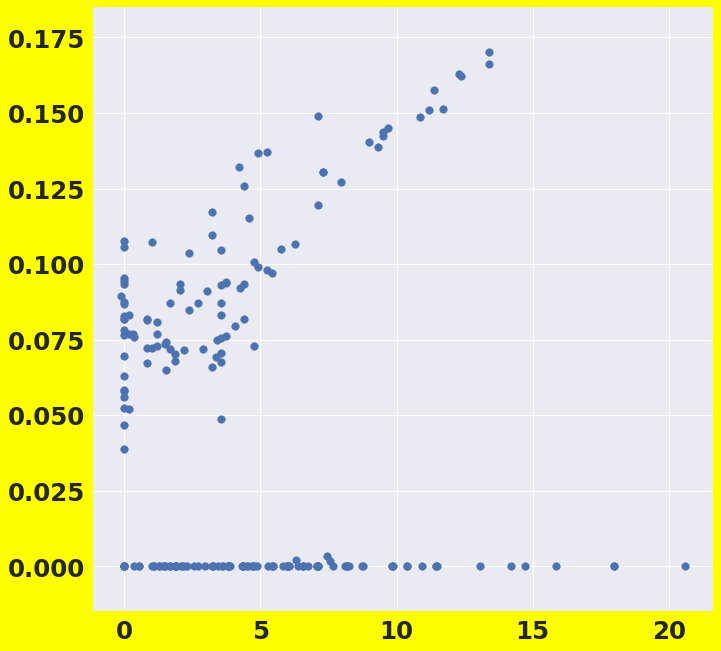

In [429]:
plt.figure(num=10, figsize=(10, 10), dpi=80, facecolor='yellow', edgecolor='k')
plt.scatter(greedy, network)
plt.show()